In [1]:
# Importar librerías esenciales para la construcción del modelo
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [7]:
# Crear una instancia del generador de datos con transformaciones
generador_aumento = ImageDataGenerator(
    rescale=1./255,  # Normalización de los píxeles
    rotation_range=30,  # Rotación aleatoria de hasta 30 grados
    width_shift_range=0.2,  # Traslación horizontal de hasta el 20%
    height_shift_range=0.2,  # Traslación vertical de hasta el 20%
    shear_range=0.2,  # Cizallamiento de hasta el 20%
    zoom_range=0.2,  # Zoom aleatorio de hasta el 20%
    horizontal_flip=True,  # Voltea horizontalmente las imágenes
    fill_mode='nearest',  # Completa los píxeles vacíos después de la transformación
    validation_split=0.2  # Divide el 20% de las imágenes para validación
)

# Definir la ruta al dataset de imágenes
ruta_dataset = 'FrutasVegetales\EntrenamientoValidacion'

# Cargar las imágenes de entrenamiento con aumento de datos
entrenamiento_imagenes = generador_aumento.flow_from_directory(
    ruta_dataset,
    target_size=(128, 128),  # Redimensiona las imágenes a 128x128 píxeles
    batch_size=32,  # Tamaño del lote de imágenes
    class_mode='categorical',  # Clasificación con varias clases
    subset='training'  # Subconjunto para entrenamiento
)

# Cargar las imágenes de validación
validacion_imagenes = generador_aumento.flow_from_directory(
    ruta_dataset,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # Subconjunto para validación
)

Found 421 images belonging to 6 classes.
Found 101 images belonging to 6 classes.


In [8]:
# Generador de imágenes para el conjunto de prueba (sin aumento de datos)
generador_pruebas = ImageDataGenerator(rescale=1./255)

# Cargar las imágenes de prueba
pruebas_imagenes = generador_pruebas.flow_from_directory(
    'FrutasVegetales\Prueba',  # Ruta del conjunto de prueba
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # No mezclar, para poder comparar resultados
)


Found 60 images belonging to 6 classes.


In [9]:
# Definir tres arquitecturas distintas
# Modelo 1: Red neuronal simple con 2 capas convolucionales
def crear_red_simple():
    modelo = Sequential()
    modelo.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
    modelo.add(MaxPooling2D(pool_size=(2, 2)))
    modelo.add(Conv2D(64, (3, 3), activation='relu'))
    modelo.add(MaxPooling2D(pool_size=(2, 2)))
    modelo.add(Flatten())  # Aplanar las características extraídas
    modelo.add(Dense(128, activation='relu'))
    modelo.add(Dropout(0.5))  # Evitar sobreajuste
    modelo.add(Dense(6, activation='softmax'))  # Salida con 6 clases
    modelo.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return modelo


In [10]:
# Modelo 2: Red intermedia con 3 capas convolucionales
def crear_red_intermedia():
    modelo = Sequential()
    modelo.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
    modelo.add(MaxPooling2D(pool_size=(2, 2)))
    modelo.add(Conv2D(64, (3, 3), activation='relu'))
    modelo.add(MaxPooling2D(pool_size=(2, 2)))
    modelo.add(Conv2D(128, (3, 3), activation='relu'))
    modelo.add(MaxPooling2D(pool_size=(2, 2)))
    modelo.add(Flatten())
    modelo.add(Dense(256, activation='relu'))
    modelo.add(Dropout(0.5))
    modelo.add(Dense(6, activation='softmax'))
    modelo.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return modelo


In [11]:
# Modelo 3: Red avanzada con más capas y neuronas
def crear_red_avanzada():
    modelo = Sequential()
    modelo.add(Conv2D(64, (3, 3), activation='relu', input_shape=(128, 128, 3)))
    modelo.add(MaxPooling2D(pool_size=(2, 2)))
    modelo.add(Conv2D(128, (3, 3), activation='relu'))
    modelo.add(MaxPooling2D(pool_size=(2, 2)))
    modelo.add(Conv2D(256, (3, 3), activation='relu'))
    modelo.add(MaxPooling2D(pool_size=(2, 2)))
    modelo.add(Flatten())
    modelo.add(Dense(512, activation='relu'))
    modelo.add(Dropout(0.5))
    modelo.add(Dense(6, activation='softmax'))
    modelo.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return modelo


In [ ]:
# Entrenar el modelo simple (Modelo 1)
modelo_simple = crear_red_simple()
historial_simple = modelo_simple.fit(
    entrenamiento_imagenes,
    steps_per_epoch=entrenamiento_imagenes.samples // 32,
    epochs=10,
    validation_data=validacion_imagenes,
    validation_steps=validacion_imagenes.samples // 32
)


In [ ]:
# Entrenar el modelo intermedio (Modelo 2)
modelo_intermedio = crear_red_intermedia()
historial_intermedio = modelo_intermedio.fit(
    entrenamiento_imagenes,
    steps_per_epoch=entrenamiento_imagenes.samples // 32,
    epochs=10,
    validation_data=validacion_imagenes,
    validation_steps=validacion_imagenes.samples // 32
)


In [14]:
# Entrenar el modelo avanzado (Modelo 3)
modelo_avanzado = crear_red_avanzada()
historial_avanzado = modelo_avanzado.fit(
    entrenamiento_imagenes,
    steps_per_epoch=entrenamiento_imagenes.samples // 32,
    epochs=10,
    validation_data=validacion_imagenes,
    validation_steps=validacion_imagenes.samples // 32
)


Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.2007 - loss: 2.6210 - val_accuracy: 0.3750 - val_loss: 1.5484
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3125 - loss: 1.6457 - val_accuracy: 0.6000 - val_loss: 1.6065
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 16s 878ms/step - accuracy: 0.4263 - loss: 1.4568 - val_accuracy: 0.4062 - val_loss: 1.4101
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3750 - loss: 1.5864 - val_accuracy: 0.2000 - val_loss: 1.4976
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 17s 873ms/step - accuracy: 0.4239 - loss: 1.4518 - val_accuracy: 0.5312 - val_loss: 1.1459
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5312 - loss: 1.0619 - val_accuracy: 0.4000 - val_loss: 1.1014
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 17s 799ms/step - accuracy: 0.4602 - loss: 1.2414 - val_accuracy: 0.5521 - val_loss: 1.0077
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5625 - loss: 1.0010 - val_accuracy: 0.8000 - 

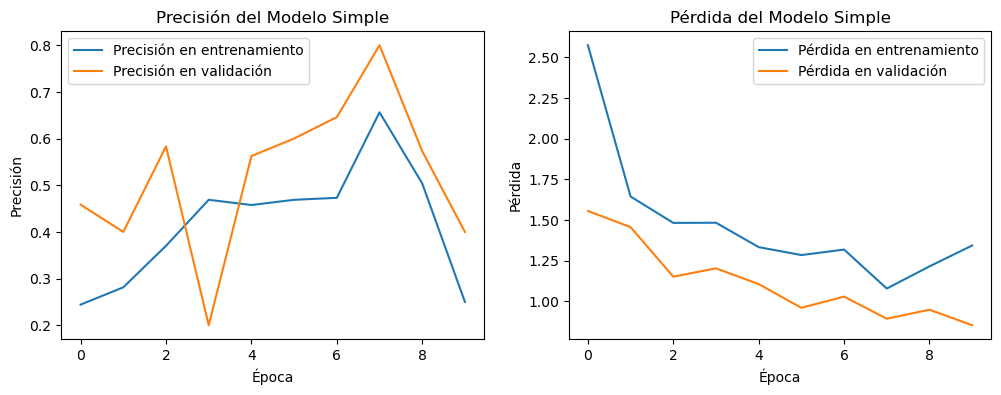

In [15]:
# Visualización de los resultados del Modelo Simple
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(historial_simple.history['accuracy'], label='Precisión en entrenamiento')
plt.plot(historial_simple.history['val_accuracy'], label='Precisión en validación')
plt.title('Precisión del Modelo Simple')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(historial_simple.history['loss'], label='Pérdida en entrenamiento')
plt.plot(historial_simple.history['val_loss'], label='Pérdida en validación')
plt.title('Pérdida del Modelo Simple')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()

plt.show()


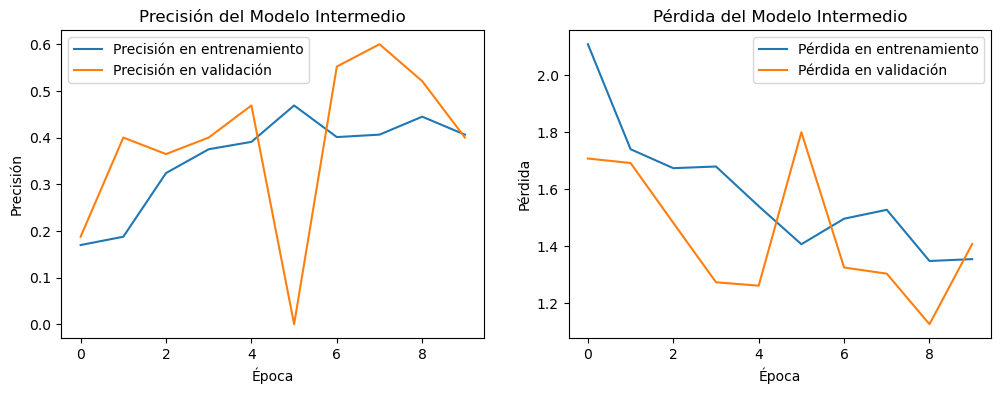

In [17]:
# Visualización de los resultados del Modelo Intermedio
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(historial_intermedio.history['accuracy'], label='Precisión en entrenamiento')
plt.plot(historial_intermedio.history['val_accuracy'], label='Precisión en validación')
plt.title('Precisión del Modelo Intermedio')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(historial_intermedio.history['loss'], label='Pérdida en entrenamiento')
plt.plot(historial_intermedio.history['val_loss'], label='Pérdida en validación')
plt.title('Pérdida del Modelo Intermedio')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

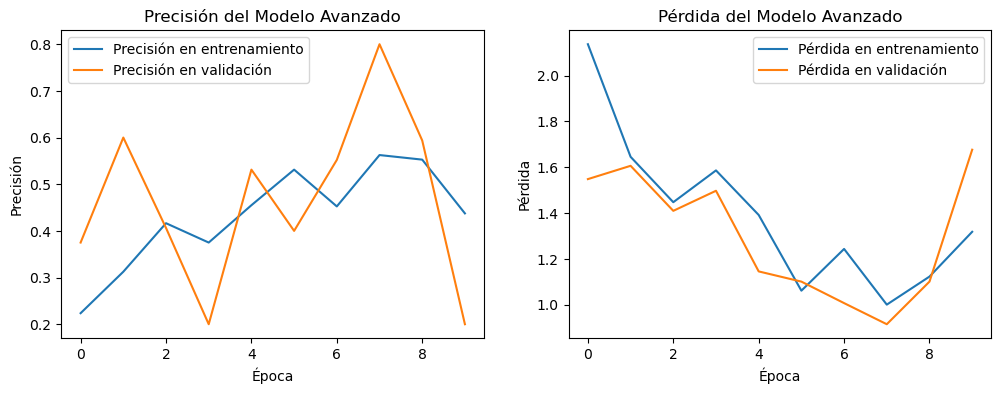

In [18]:
# Visualización de los resultados del Modelo Avanzado
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(historial_avanzado.history['accuracy'], label='Precisión en entrenamiento')
plt.plot(historial_avanzado.history['val_accuracy'], label='Precisión en validación')
plt.title('Precisión del Modelo Avanzado')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(historial_avanzado.history['loss'], label='Pérdida en entrenamiento')
plt.plot(historial_avanzado.history['val_loss'], label='Pérdida en validación')
plt.title('Pérdida del Modelo Avanzado')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

In [16]:
# Evaluar los modelos en el conjunto de prueba
evaluacion_simple = modelo_simple.evaluate(pruebas_imagenes)
evaluacion_intermedio = modelo_intermedio.evaluate(pruebas_imagenes)
evaluacion_avanzado = modelo_avanzado.evaluate(pruebas_imagenes)

print(f"Precisión del modelo simple: {evaluacion_simple[1]*100:.2f}%")
print(f"Precisión del modelo intermedio: {evaluacion_intermedio[1]*100:.2f}%")
print(f"Precisión del modelo avanzado: {evaluacion_avanzado[1]*100:.2f}%")

# Seleccionar el mejor modelo basado en la precisión de prueba
if evaluacion_simple[1] > evaluacion_intermedio[1] and evaluacion_simple[1] > evaluacion_avanzado[1]:
    mejor_modelo = 'Modelo Simple'
elif evaluacion_intermedio[1] > evaluacion_simple[1] and evaluacion_intermedio[1] > evaluacion_avanzado[1]:
    mejor_modelo = 'Modelo Intermedio'
else:
    mejor_modelo = 'Modelo Avanzado'

print(f"El mejor modelo es: {mejor_modelo}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.5437 - loss: 0.9159  
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.5861 - loss: 0.9220  
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.5556 - loss: 0.9706  
Precisión del modelo simple: 55.00%
Precisión del modelo intermedio: 56.67%
Precisión del modelo avanzado: 58.33%
El mejor modelo es: Modelo Avanzado
